# FINC621 Winter 2018-19 Lab Worksheet 01

author: "Fady Harfoush"

date: "November 20, 2018"

output:

 html_notebook: default
  
 html_document: default
 
subtitle: Exploration of python in Finance (finc621-lab01)

# About

This worksheet is your warm-up exercises to getting started with some python for finance, based on  examples from the book. It is also your getting started with problems solving (no python required) and expressing your methods/answers using proper mathematical symbols and representations.

# Setup

Remember to always set your working directory to the source file location. Go to 'Session', scroll down to 'Set Working Directory', and click 'To Source File Location'. Read carefully the below and follow the instructions to complete the tasks and answer any questions.  Submit your work to RPubs as detailed in previous notes.

# Note

For clarity, tasks/questions to be completed/answered are highlighted in red color (color visible only in preview mode) and numbered according to their particular placement in the task section.  Type your answers outside the red color tags!


Quite often you will need to add your own code chunk. Execute sequentially all code chunks, preview, publish, and submit link on Sakai following the naming convention. Make sure to add comments to your code where appropriate. Use own language!

## Task 1: Charting Stock Time Series 

This task follows the book's R Example 1.1/p. 8 also exhibited in the R-Labs section R Labs1 from the book’s website (*). In order to work with R in finance we need to first install the package `quantmod` that allows us to retrieve financial data and conduct various statistical analysis.

In [30]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} numpy 

Solving environment: done

# All requested packages already installed.



In [31]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
import sys
!pip3 install http://github.com/matplotlib/mpl_finance/archive/master.zip

     - 624kB 42.0MB/s
  Stored in directory: /private/var/folders/p4/gbbt6j517yqg7y3h1t8b8kqc0000gn/T/pip-ephem-wheel-cache-6vpxjvc_/wheels/e3/25/8e/f7f4034c969c9f4392f818dabfc3a467492043dbb45acb6d52
Successfully built mpl-finance
You are using pip version 19.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [33]:
# https://pypi.org/search/?q=datareader
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from matplotlib import style


import pandas as pd
import pandas_datareader.data as web


In [34]:
# install mpl_finance from github, cause mpl_finance is not in pip
# pip3 install http://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick_ohlc

<font color=red>### 1A) Insert in the code chunk below the rest of the code to calculate and chart the time series for stock GE.  Follow the example in the book. Add comments, where appropriate, explaining what the particular line(s) of code is/are executing/solving for.</font>

In [35]:
style.use('ggplot')
start=dt.datetime(2000,1,1)
end=dt.datetime(2009,12,31)
df=web.DataReader('GE','yahoo',start,end)
print(df.head(5))
# df.to_csv('ge.csv')
# df=pd.read_csv('ge.csv')
# print(df.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2000-01-03  49.258816  47.816505  49.038460  48.076923  22952600.0  25.635056
2000-01-04  47.435898  46.153847  47.195515  46.153847  23006300.0  24.609671
2000-01-05  47.115383  45.693108  46.073719  46.073719  28384500.0  24.566944
2000-01-06  47.095352  45.713142  45.873398  46.689678  20668100.0  24.895370
2000-01-07  48.677883  47.115383  47.435898  48.497597  20947100.0  25.859369


In [36]:
# GE Adjusted close price
GeAdj=df[:20][ 'Adj Close' ]
print(GeAdj.head())

Date
2000-01-03    25.635056
2000-01-04    24.609671
2000-01-05    24.566944
2000-01-06    24.895370
2000-01-07    25.859369
Name: Adj Close, dtype: float64


In [37]:
# GE adjusted close price max
GeAdj.max()

26.27593421936035

In [38]:
# GE adjusted close price min
GeAdj.min()

22.900659561157227

In [39]:
# GE adjusted close price mean
GeAdj.mean()

24.855998516082764

Text(0.5,0,'Date')

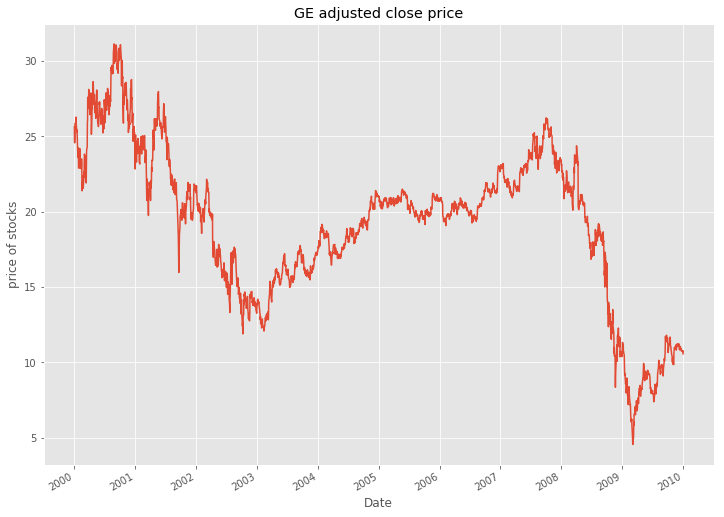

In [40]:
# graph of GE adjusted close price 
df['Adj Close'].plot(figsize=(12,9))
plt.title( "GE adjusted close price")
plt.ylabel("price of stocks")
plt.xlabel("Date")


In [41]:
#df['100ma']=df['Adj Close'].rolling(window=100).mean()
#print(df.tail())

In [42]:
# modify na data
# df.dropna(inplace=True)
# print(df.head())

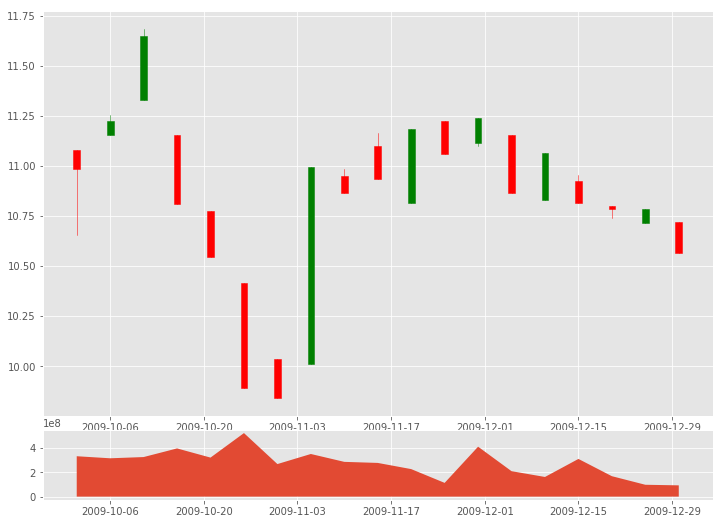

In [43]:
# GE candlestick graph
style.use('ggplot')
start=dt.datetime(2009,10,1)
end=dt.datetime(2009,12,31)
df=web.DataReader('GE','yahoo',start,end)
# print(df.head(5))

df_ohlc=df['Adj Close'].resample('5D').ohlc()
df_volume=df['Volume'].resample('5D').sum()
df_ohlc.reset_index(inplace=True)


df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

plt.figure(figsize=(12,9))


ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values,width=1,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume,0)




### Task 2: Comparing Performance of Stocks Time Series

This follows the book’s example 1.3.4 R Lab/p. 34 also R Labs 1 from the book’s website (*). 

<font color=red>##### 2A) Insert the code chunk to chart instead the performance of Value Line Index VLIC (sort of benchmark), and four other stocks of your choice over a time period dating back one year from present date.</font>

In [44]:
# gain data from yahoo
start=dt.datetime(2016,11,6)
end=dt.datetime(2017,11,2)
tickers=['^VLIC','NFLX','TWTR','M','MCD']
df=web.DataReader(tickers,'yahoo',start,end)

In [45]:
# gain adjust close price of stocks
VLICad=df['Adj Close']['^VLIC']
NFLXad=df['Adj Close']['NFLX']
TWTRad=df['Adj Close']['TWTR']
Madad=df['Adj Close']['M']
MACad=df['Adj Close']['MCD']

In [46]:
# compute cumulative sum of daily return
vl=np.cumsum(VLICad.pct_change()*100)
nf=np.cumsum(NFLXad.pct_change()*100)
tw=np.cumsum(TWTRad.pct_change()*100)
ma=np.cumsum(Madad.pct_change()*100)
mac=np.cumsum(MACad.pct_change()*100)

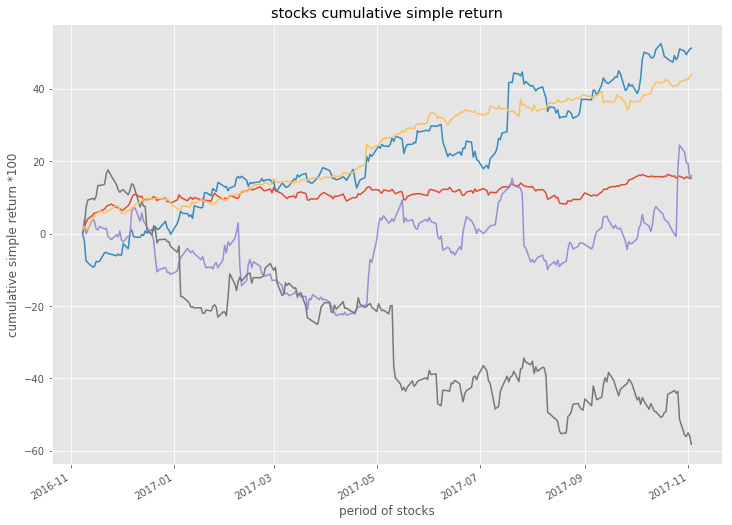

In [47]:
# vlic is orange
vl.plot(figsize=(12,9)) 
# nflx is blue
nf.plot(figsize=(12,9))
# twtr is violet
tw.plot(figsize=(12,9))
# mad is deep gray
ma.plot(figsize=(12,9))
# mac is red
mac.plot(figsize=(12,9))
plt.title( "stocks cumulative simple return")
plt.xlabel("period of stocks")
plt.ylabel("cumulative simple return *100")
plt.show()

<font color=red>##### 2B) Write the mathematical form/representation, using proper math symbols, to describe the formula being calculated and plotted in the code.</font>

$$ R_t = 100 * \sum_{i=1}^n (P_i/P_{i-1} -1) $$ 
 where i = 1,n represents the date index for the selected date range and $R_t$ is the cumulative simple return in percent over the date range.

<font color=red>##### 2C) Write a  paragraph, in your own words, comparing the stock performances based on your assessment of the companies general business and their valuation vis-a-vis the market overall performance, and pertinent econonomical factors.</font>

Twitter has been experiencing many issues in leadership and also in expanding their users base.  The company is struggling to generate profits and is undergoing internal restructuring to set a stronger vision and a more compelling business value proposition. Netflix has been gaining more market shares in the rapidly growing digital media, the on-demand and the custom tailored offerings. Macy's has been slow catching on changing landscape and is struggling to reposition itself to better compete in the on-line business.  Sears is a great recent example of a failed vision. McDonald since the appointment of a new leadership (after a failed previous leadership) and the re-architecting of some of their menu offerings seems overall to be gaining grounds and is well veiwed by the industry. Recent analyst reports indicate stronger future prospects.

To add math symbols in python Markdown check the link(https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html).
Many other examples are on Google. Following is an example: $\sum_{n=1}^{10} n^2$.  Other, less preferred options, is to neatly handwrite your equations on a paper or use own preferred tools like Microsoft Word, take a clear image capture of your work and include here.  Hard to read work will be dismissed.

In [48]:
# import Image
# myimage=Image.open("filename")
# myimage.show()

### Task 3: Problem(s) Solving

This task does not require use of R code.  You will however need to type your work here, using proper mathematical symbols and representations, or include a clear image capture of your work.

<font color=red>##### 3A) Solve for 1.3.8 Problem/p. 36.</font>

Following the example 1.11/p.27 in the book and the principle of no arbitrage we can write that the equivalent stock shares for the call option is 

$$\Delta_c = \frac{C_u - C_d}{S_u -S_d}$$ where $$C_u = S_u -K = 40 -20 = 20; C_d = 0; S_u =40; S_d =15$$.  All units are in Euros.

Hence $$\Delta_c = \frac{20-0}{40-15} = 0.8$$

The equivalent loan amount $$\hat {B}$$ can be calculated using the formula $$\frac{\Delta_c S_u -C_u}{1+r}$$ where $$r$$ is the interest rate for the period i.e six months in this case.  Therefore $$\hat {B} = \frac{0.8*15 - 0}{1+0.05} = 11.431$$.

The current value of the call option can be calculated using the general formula $$C = \Delta_c S - (1+r)^t \hat {B}$$ and recognizing that $$(1+r)^t = 1; S = 25$$ at time $$t=0$$.

Hence $$C = 0.8*25 - 1*11.43 = 8.57$$.

The coresponding put option is calculated using the put-call parity equality $$P + S = C + K e^{-rt}$$.  In this case we have $$P + 25 = 8.57 + 20 e^{-0.05}$$ or $$P = 2.59$$

<font color=red>##### 3B) Solve for 1.3.9 Problem/p. 36.</font>

There are two ways to solve this problem in general.  In first approach we write the put-call parity equality which should be satisfied at all times.
$$P_u + S_u = C_u + K e^{-rt}$$ and $$P_d +S_d = C_d + K e^{-rt}$$.  

By substracting the above two equations we obtain $$(P_u - P_d) + (S_u -S_d) = (C_u -C_d)$$.

Dividing both sides by the change in stock price or spread $$S_u - S_d$$ we have $$\frac{P_u - P_d}{S_u -S_d} + 1 = \frac{C_u -C_d}{S_u -S_d}$$  or $$\Delta_p + 1 = \Delta_c$$.  

Another approach would be to simply take the partial derivative of the call-parity equality w.r.t change in stock price.  This can be written as
$$\frac{\partial(P+S)}{\partial S} = \frac{\partial (C+K e^{-rt})}{\partial S}$$. 

Recognizing the additive property of  derivatives and assuming non-dependence of the last term on the stock price we have $$\partial(\frac{P}{S}) + 1 = \partial(\frac{C}{S})$$. 

Written in other form we have $$\Delta_p + 1 = \Delta_c$$.

Finally we can confirm the formula by applying to our previous problem where

$$\Delta_c = \frac{20-0}{40-15} = 0.8$$ and $$\Delta_p = \frac{0-5}{40-15} = -0.2$$ resulting in $$0.8 - 1 = -0.2$$